In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# Завантаження даних
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [14]:
data = fetch_california_housing()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

print("Перші рядки даних:")
print(df.head())

Перші рядки даних:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [16]:
#1.	Провести попередній аналіз даних за схемою (дивиться вище)
print("\n пропущені значення:")
print(df.isnull().sum())
print("\n наявність дублікатів:")
print(df.duplicated().sum())
print("\nРозмір таблиці:")
print(df.shape)

print(df.dtypes)


 пропущені значення:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

 наявність дублікатів:
0

Розмір таблиці:
(20640, 9)
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object


In [18]:
#2.	Масштабувати ознаки.
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
#3.	Поділити дані на тренувальні і тестові.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
#4.	Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor()
}


param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }
}

best_models = {}

for name, model in models.items():
    print(f"\nНалаштування параметрів для {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model.fit(X_train, y_train)
        print(f"{name} не потребує налаштування параметрів.")

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nОцінка {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")


Налаштування параметрів для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштування параметрів для Ridge Regression...
Найкращі параметри для Ridge Regression: {'alpha': 0.1}

Налаштування параметрів для Random Forest Regressor...
Найкращі параметри для Random Forest Regressor: {'max_depth': None, 'n_estimators': 200}

Оцінка Linear Regression:
Mean Squared Error: 0.56
R^2 Score: 0.58

Оцінка Ridge Regression:
Mean Squared Error: 0.56
R^2 Score: 0.58

Оцінка Random Forest Regressor:
Mean Squared Error: 0.25
R^2 Score: 0.81


In [23]:
#5.	Вивести R2      і  MSE. Побудувати графіки
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nОцінка {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")


Оцінка Linear Regression:
Mean Squared Error: 0.56
R^2 Score: 0.58

Оцінка Ridge Regression:
Mean Squared Error: 0.56
R^2 Score: 0.58


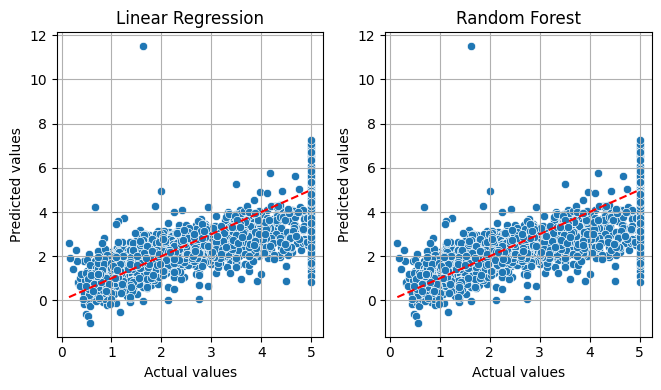

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

# Scatter plot для Лінійної регресії
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=best_models['Linear Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

# Scatter plot для Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=best_models['Ridge Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

# Відображення графіків
plt.tight_layout()
plt.show()

In [31]:
print(best_models.keys())
# при введенні 'Random Forest Regressor' вивбивало помилку, і таким методом я знайшшла правильне ім'я моделі в словнику


dict_keys(['Linear Regression', 'Ridge Regression'])


In [33]:
#6.	Вивести справжні і прогнозовані значення.
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    results_df = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані значення': y_pred})
    print(f"\nСправжні і прогнозовані значення ({name}):")
    print(results_df.head())


Справжні і прогнозовані значення (Linear Regression):
       Справжні значення  Прогнозовані значення
20046            0.47700               0.719123
3024             0.45800               1.764017
15663            5.00001               2.709659
20484            2.18600               2.838926
9814             2.78000               2.604657

Справжні і прогнозовані значення (Ridge Regression):
       Справжні значення  Прогнозовані значення
20046            0.47700               0.719158
3024             0.45800               1.763999
15663            5.00001               2.709621
20484            2.18600               2.838910
9814             2.78000               2.604610
